In [0]:
from google.colab import files
uploaded = files.upload()

Saving brasilia.csv to brasilia.csv
Saving florida.csv to florida.csv
Saving hawaii.csv to hawaii.csv
Saving panama.csv to panama.csv
Saving puerto.csv to puerto.csv
Saving samoa.csv to samoa.csv


In [0]:
names = []
for i in uploaded:
  print(i)
  names.append(i)

brasilia.csv
florida.csv
hawaii.csv
panama.csv
puerto.csv
samoa.csv


In [0]:
import pandas as pd
import numpy as np

data = pd.DataFrame([])

In [0]:
for i in names:
  df = pd.read_csv(i)
  place = i.replace('.csv','')
  df['location'] = len(df) * [place]
  data = data.append(df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


##All the collected data from both datasets

In [0]:
data.head()

,DHI,DNI,GHI,Solar Zenith Angle,Temperature,Unnamed: 0,apparentTemperature,cel,cloudCover,date,dewPoint,humidity,icon,location,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,0,0,0,137.15,17,0,70.64,21.150000,0.19,2011-01-05 02:00:00,64.40,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Partly Cloudy,70.07,1294192800,0.0,6.216,350.0,NaN,3.46
1,0,0,0,141.25,17,1,70.41,21.150000,0.75,2011-01-05 03:00:00,62.59,0.77,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,70.07,1294196400,0.0,6.216,281.0,NaN,4.61
2,0,0,0,140.03,17,2,68.65,20.144444,0.75,2011-01-05 04:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294200000,0.0,6.216,311.0,NaN,2.29
3,0,0,0,133.91,17,3,68.65,20.144444,0.75,2011-01-05 05:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294203600,0.0,6.216,20.0,NaN,2.29
4,0,0,0,124.48,17,4,68.65,20.144444,0.75,2011-01-05 06:00:00,62.59,0.82,partly-cloudy-night,brasilia,NaN,NaN,rain,NaN,Mostly Cloudy,68.26,1294207200,0.0,6.216,260.0,NaN,3.46


In [0]:
data.shape

(10756, 26)

In [0]:
!pip install pysolar

#Testing Pysolar

In [0]:
from pysolar.solar import *

date = datetime.datetime(2015, 2, 1, 2, 30, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(6.75189646, -47.850555, date)

162.99849552142672

In [0]:
from datetime import datetime
mix = datetime.fromtimestamp(1294192800).strftime('%Y,%m,%d,%H')
spt = mix.split(',')
import datetime
date = datetime.datetime(int(spt[0]), int(spt[1]), int(spt[2]), int(spt[3]), 0, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(-15.864128, -47.850555, date)

137.1655767225235

In [0]:
brasilia = [-15.864128,-47.850555]
samoa = [-14.333216,-170.778926]
puerto = [18.220833,-66.590149]
panama = [8.906780,-79.810277]
hawaii = [19.410648, -155.587336]
florida = [26.155438,-80.806503]

In [0]:
def lat(li):
  if li == 'brasilia':
    re = [-15.864128,-47.850555]
  elif li == 'samoa':
    re = [-14.333216,-170.778926]
  elif li == 'puerto':
    re = [18.220833,-66.590149]
  elif li == 'panama':
    re = [8.906780,-79.810277]
  elif li == 'hawaii':
    re = [19.410648, -155.587336]
  elif li == 'florida':
    re = [26.155438,-80.806503]
  return(re[0])

def lon(li):
  if li == 'brasilia':
    re = [-15.864128,-47.850555]
  elif li == 'samoa':
    re = [-14.333216,-170.778926]
  elif li == 'puerto':
    re = [18.220833,-66.590149]
  elif li == 'panama':
    re = [8.906780,-79.810277]
  elif li == 'hawaii':
    re = [19.410648, -155.587336]
  elif li == 'florida':
    re = [26.155438,-80.806503]
  return(re[1])  

In [0]:
data['lat'] = data.location.apply(lat)
data.lat.shape

(10756,)

In [0]:
data['long'] = data.location.apply(lon)

In [0]:
data.long.shape

(10756,)

##Data I need to created the Zenith Angle Feature

In [0]:
data[['time','lat','long']].head()

,time,lat,long
0,1294192800,-15.864128,-47.850555
1,1294196400,-15.864128,-47.850555
2,1294200000,-15.864128,-47.850555
3,1294203600,-15.864128,-47.850555
4,1294207200,-15.864128,-47.850555


In [0]:
tr = data[['time','lat','long']].values

##function to calculate the Zenith angle

In [0]:
def zen(time,lat,lon):
  from datetime import datetime
  mix = datetime.fromtimestamp(time).strftime('%Y,%m,%d,%H')
  spt = mix.split(',')
  import datetime
  date = datetime.datetime(int(spt[0]), int(spt[1]), int(spt[2]), int(spt[3]), 0, tzinfo=datetime.timezone.utc)
  return(float(90) - get_altitude(lat, lon, date))

In [0]:
zenith = []
for i in tr:
  zed = zen(i[0],i[1],i[2])
  zenith.append(zed)

In [0]:
data['zen'] = zenith

##the Zenith angle from my cal. compared with the zenith angle provided from the first data set.

In [0]:
data[['zen','Solar Zenith Angle']].head()

,zen,Solar Zenith Angle
0,137.165577,137.15
1,141.265958,141.25
2,140.040986,140.03
3,133.913979,133.91
4,124.488612,124.48


In [0]:
a = data.zen - data['Solar Zenith Angle']

##the calcuation worked.

In [0]:
a.describe()

count    10756.000000
mean        -0.018925
std          0.067923
min         -0.608175
25%         -0.020628
50%         -0.002909
75%          0.010213
max          0.040966
dtype: float64

In [0]:
data.summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Clear', 'Foggy', 'Overcast',
       'Possible Drizzle', 'Humid', 'Possible Drizzle and Humid',
       'Possible Light Rain', 'Possible Light Rain and Humid',
       'Light Rain and Humid', 'Rain', 'Light Rain', 'Drizzle and Humid',
       'Heavy Rain', 'Drizzle', 'Rain and Humid',
       'Humid and Partly Cloudy', 'Humid and Overcast',
       'Humid and Mostly Cloudy', 'Humid and Foggy', 'Windy',
       'Windy and Humid', 'Windy and Partly Cloudy',
       'Heavy Rain and Humid'], dtype=object)

In [0]:
data.dtypes

DHI                      int64
DNI                      int64
GHI                      int64
Solar Zenith Angle     float64
Temperature              int64
Unnamed: 0               int64
apparentTemperature    float64
cel                    float64
cloudCover             float64
date                    object
dewPoint               float64
humidity               float64
icon                    object
location                object
precipIntensity        float64
precipProbability      float64
precipType              object
pressure               float64
summary                 object
temperature            float64
time                     int64
uvIndex                float64
visibility             float64
windBearing            float64
windGust               float64
windSpeed              float64
lat                    float64
long                   float64
zen                    float64
dtype: object

In [0]:
data.isna().sum()

DHI                       0
DNI                       0
GHI                       0
Solar Zenith Angle        0
Temperature               0
Unnamed: 0                0
apparentTemperature      90
cel                      90
cloudCover             4769
date                      0
dewPoint                141
humidity                141
icon                      0
location                  0
precipIntensity         904
precipProbability       904
precipType             9018
pressure               6261
summary                   0
temperature              90
time                      0
uvIndex                2172
visibility             4442
windBearing             811
windGust               2695
windSpeed               102
lat                       0
long                      0
zen                       0
dtype: int64

In [0]:
data.describe()

,DHI,DNI,GHI,Solar Zenith Angle,Temperature,Unnamed: 0,apparentTemperature,cel,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,lat,long,zen
count,10756.000000,10756.000000,10756.000000,10756.000000,10756.000000,10756.000000,10666.000000,10666.000000,5987.000000,10615.000000,10615.000000,9852.000000,9852.00000,4495.000000,10666.000000,1.075600e+04,8584.000000,6314.000000,9945.000000,8061.000000,10654.000000,10756.000000,10756.000000,10756.000000
mean,81.376720,233.632763,234.120398,89.190034,20.850781,903.571867,71.571711,21.007448,0.475788,63.127747,0.821067,0.002520,0.03706,1012.839889,69.813406,1.382405e+09,1.542288,7.816623,142.903167,9.769163,5.159428,7.878029,-101.569566,89.171109
std,124.038142,345.317204,318.587373,45.109551,8.374862,530.873307,17.796036,8.168860,0.308210,12.893191,0.173257,0.049906,0.15406,3.601813,14.703949,5.871885e+07,2.737084,1.955750,102.438448,6.238702,3.459419,16.563606,46.101934,45.118524
min,0.000000,0.000000,0.000000,1.180000,-1.000000,0.000000,22.800000,-1.688889,0.000000,21.820000,0.130000,0.000000,0.00000,998.100000,28.960000,1.262668e+09,0.000000,0.000000,0.000000,0.000000,0.000000,-15.864128,-170.778926,1.197633
25%,0.000000,0.000000,0.000000,50.057500,18.000000,448.000000,64.990000,18.144444,0.190000,53.590000,0.730000,0.000000,0.00000,1010.600000,64.660000,1.333608e+09,0.000000,6.216000,67.000000,5.290000,2.650000,-14.333216,-155.587336,50.038021
50%,0.000000,0.000000,0.000000,88.950000,24.000000,896.000000,76.020000,23.883333,0.440000,67.650000,0.860000,0.000000,0.00000,1012.910000,74.990000,1.383665e+09,0.000000,7.002000,102.000000,8.610000,4.610000,18.220833,-80.806503,88.604879
75%,108.000000,429.250000,446.000000,128.520000,27.000000,1344.000000,83.800000,26.627778,0.750000,73.390000,0.970000,0.000000,0.00000,1014.990000,79.930000,1.433491e+09,2.000000,9.997000,221.000000,13.000000,6.977500,19.410648,-66.590149,128.519551
max,613.000000,1097.000000,1139.000000,178.000000,36.000000,2015.000000,113.440000,37.383333,1.000000,84.210000,1.000000,3.739800,1.00000,1035.390000,99.290000,1.481015e+09,14.000000,10.000000,359.000000,46.980000,32.990000,26.155438,-47.850555,178.023519


In [0]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.5MB/s 


In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


#Train test split

In [0]:
test = data[data.location == 'hawaii']
train = data[data.location != 'hawaii']

In [0]:
train.shape

(8740, 29)

In [0]:
test.shape

(2016, 29)

In [0]:
test.columns

Index(['DHI', 'DNI', 'GHI', 'Solar Zenith Angle', 'Temperature', 'Unnamed: 0',
       'apparentTemperature', 'cel', 'cloudCover', 'date', 'dewPoint',
       'humidity', 'icon', 'location', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'time', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'lat', 'long',
       'zen'],
      dtype='object')

##Final features for model

In [0]:
target = 'GHI'
features = ['zen', 'temperature', 'summary','pressure','visibility','uvIndex','dewPoint','cloudCover','precipProbability'] #'visibility', 'windBearing', 'windGust', 'windSpeed','precipType', 'pressure', 'summary',

In [0]:
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),    
    SimpleImputer(),
    RandomForestRegressor(n_estimators=200,min_samples_leaf=10)
)

pipeline.fit(train[features],train[target])

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred_train = pipeline.predict(train[features])

print('Train R2 Score: '+ str(r2_score(train[target],y_pred_train)))
print("Train Mean Absolute Error: " + str(mean_absolute_error(train[target],y_pred_train)))

y_pred_test = pipeline.predict(test[features])

print('Test R2 Score: ' + str(r2_score(test[target],y_pred_test)))
print("Train Mean Absolute Error: " + str(mean_absolute_error(test[target],y_pred_test)))

Train R2 Score: 0.9213246490580935
Train Mean Absolute Error: 42.314969820311404
Test R2 Score: 0.9210813016560585
Train Mean Absolute Error: 54.786338671179905


In [0]:
model = pipeline.named_steps['randomforestregressor']

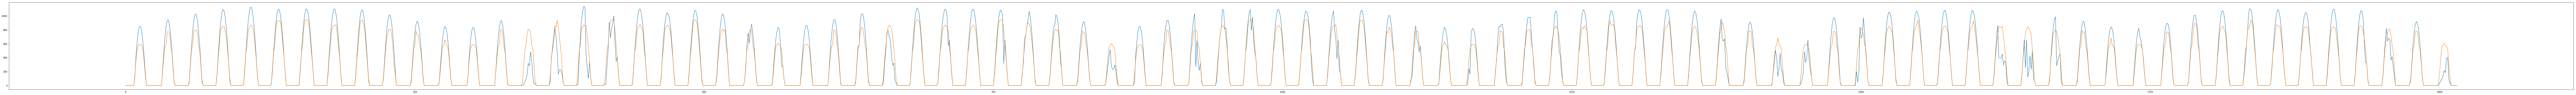

In [0]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(200,7))
plt.plot(test.index,test.GHI)
plt.plot(test.index,y_pred_test)

In [0]:
!pip install shap

     |████████████████████████████████| 245kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.30.1-cp36-cp36m-linux_x86_64.whl size=360450 sha256=bf88a5b845789cfd4fcbd45e6410c4d59e8c2c46ea81b7afefe4a07e6974b8c5
  Stored in directory: /root/.cache/pip/wheels/62/94/5e/feb9af12d63a719a32266a29ca564b4dc37b4755052aca6859
Successfully built shap


In [0]:
import shap

In [0]:
encod = ce.OrdinalEncoder()
x_train_tran = encod.fit_transform(train[features])
x_test_tran = encod.transform(test[features])


In [0]:
si = SimpleImputer()
x_train_tran = si.fit_transform(x_train_tran)
x_test_tran = si.transform(x_test_tran)

In [0]:
xtrain = pd.DataFrame(x_train_tran,columns=features)

In [0]:
xtest = pd.DataFrame(x_test_tran,columns=features)

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


## Features with the most impact

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='r2', 
    n_iter=2, 
    random_state=42
)

permuter.fit(xtrain, train[target])
feature_names = features

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
1.4994 ± 0.0195,zen
0.0795 ± 0.0030,temperature
0.0597 ± 0.0016,dewPoint
0.0167 ± 0.0000,uvIndex
0.0140 ± 0.0001,cloudCover
0.0081 ± 0.0009,precipProbability
0.0059 ± 0.0003,visibility
0.0052 ± 0.0009,pressure
0.0032 ± 0.0001,summary


##Realationship between GHI and Zenith

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

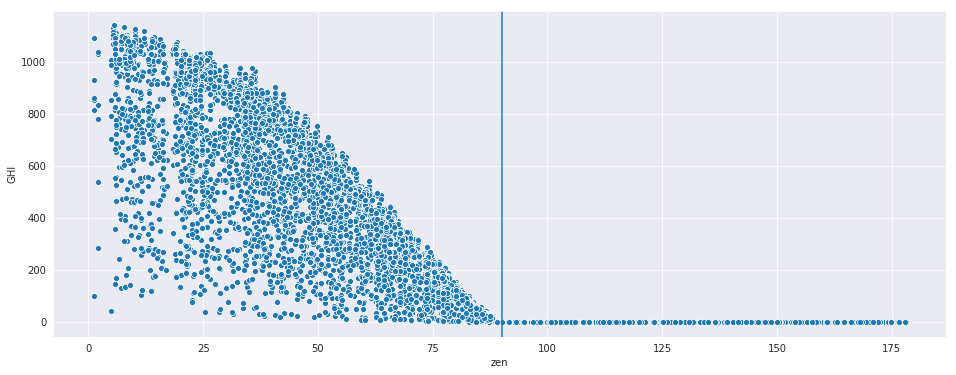

In [0]:

plt.figure(figsize=(16, 6))
psns.scatterplot(x='zen',y='GHI',data=data)
plt.axvline(90)

In [0]:
row = df.iloc[[34]]

In [0]:
row.values[0]

array([5.20891015e+01, 4.50100000e+01, 1.00000000e+00, 1.01221222e+03,
       7.00200000e+00, 4.00000000e+00, 4.50100000e+01])

In [0]:
xtrain.shape,train.shape

((8740, 9), (8740, 29))

#finding outliers

In [0]:
df = xtrain.copy()
df['GHI'] = y_pred_train
df['ghit'] = train[target].values
df.head()

,zen,temperature,summary,pressure,visibility,uvIndex,dewPoint,cloudCover,precipProbability,GHI,ghit
0,137.165577,70.07,1.0,1012.212221,6.216,0.0,64.40,0.19,0.039691,0.0,0
1,141.265958,70.07,2.0,1012.212221,6.216,0.0,62.59,0.75,0.039691,0.0,0
2,140.040986,68.26,2.0,1012.212221,6.216,0.0,62.59,0.75,0.039691,0.0,0
3,133.913979,68.26,2.0,1012.212221,6.216,0.0,62.59,0.75,0.039691,0.0,0
4,124.488612,68.26,2.0,1012.212221,6.216,0.0,62.59,0.75,0.039691,0.0,0


In [0]:
df[((df.zen < 10) & (df.zen > 7)) & (df.GHI > 900)].sort_values(by='cloudCover').head(10)

,zen,temperature,summary,pressure,visibility,uvIndex,dewPoint,cloudCover,precipProbability,GHI,ghit
5080,9.797140,91.99,1.0,1012.212221,6.216,10.0,68.29,0.19,0.000000,958.483341,997
5103,8.528779,87.07,18.0,1012.212221,6.216,10.0,75.19,0.19,0.000000,918.647855,972
5175,9.918454,88.86,18.0,1012.212221,6.216,10.0,75.19,0.19,0.000000,937.848624,976
6591,8.543776,84.37,1.0,1018.280000,9.997,10.0,71.12,0.19,0.000000,932.180300,989
6592,8.181088,85.17,1.0,1017.470000,9.997,10.0,71.83,0.19,0.000000,928.761286,993
7912,9.098158,86.32,18.0,1008.500000,10.000,11.0,76.99,0.19,0.000000,972.094570,1063
38,8.316030,84.47,1.0,1012.212221,6.216,9.0,51.79,0.44,0.039691,951.868875,512
589,7.782506,82.68,1.0,1012.212221,6.216,9.0,57.20,0.44,0.000000,982.400461,1091
876,7.792900,86.26,1.0,1012.212221,6.216,9.0,51.79,0.44,0.000000,979.173292,1135
4800,9.821399,89.89,1.0,1012.212221,6.210,9.0,66.21,0.44,0.000000,920.484080,1005


In [0]:
df[((df.zen < 10) & (df.zen > 7)) & (df.GHI < 400)].sort_values(by='cloudCover').tail()

,zen,temperature,summary,pressure,visibility,uvIndex,dewPoint,cloudCover,precipProbability,GHI,ghit
5727,8.537994,70.76,13.0,1015.19,7.625544,1.431395,70.76,0.512752,0.67,248.033858,209
5728,8.115184,69.30,13.0,1014.29,7.625544,1.431395,69.30,0.512752,0.72,238.443715,179
7240,9.864085,77.37,12.0,1015.99,9.997000,6.000000,69.81,0.750000,1.00,399.099706,280
7624,9.090607,80.31,21.0,1002.65,0.998000,5.000000,75.19,1.000000,0.00,378.220822,142


In [0]:
row = df.iloc[[34]]

##Understanding outliers from shap plots

In [0]:
from sklearn.metrics import roc_auc_score

def pred(df, locc,text):
  row = df.iloc[[locc]]

  explainer = shap.TreeExplainer(model)
  row_processed = model.predict(row)[0]
  shap_values = explainer.shap_values(row)

  names = row.columns
  values = row.values[0]
  shaps = pd.Series(shap_values[0], zip(names, values))

  pr = f'GHI pred is {row_processed}'
  res = f'baseline is {explainer.expected_value}'
  rea = shaps.to_string()
  print(text)
  print('')
  print(pr)
  print(res)
  shap.initjs()
  print(rea)
  return shap.force_plot(
      base_value=explainer.expected_value, 
      shap_values=shap_values, 
      features=row
  )

In [0]:
pred(xtrain, 4800,'Day One')

Day One

GHI pred is 920.4840798993166
baseline is 223.37466533180773


(zen, 9.821398758134961)          578.684910
(temperature, 89.89)               28.204865
(summary, 1.0)                      3.920957
(pressure, 1012.2122213137096)     -2.589423
(visibility, 6.21)                  0.058444
(uvIndex, 9.0)                     70.793420
(dewPoint, 66.21)                   1.455511
(cloudCover, 0.44)                  7.136739
(precipProbability, 0.0)            9.443991


In [0]:
pred(xtrain, 5728,'Day Two')

Day Two

GHI pred is 238.44371473270655
baseline is 223.37466533180773


(zen, 8.115184300001417)            335.966181
(temperature, 69.3)                -140.986539
(summary, 13.0)                     -14.758830
(pressure, 1014.29)                   3.152491
(visibility, 7.625543533061856)       0.213616
(uvIndex, 1.4313953488372093)       -35.262594
(dewPoint, 69.3)                    -32.373188
(cloudCover, 0.5127522746071135)      1.481621
(precipProbability, 0.72)          -102.363709


##Isolating similar zenith angles to look at precipProbablity and GHI

In [0]:
short = df[((df.zen < 20) & (df.zen > 5)) & (df.GHI > 100)]

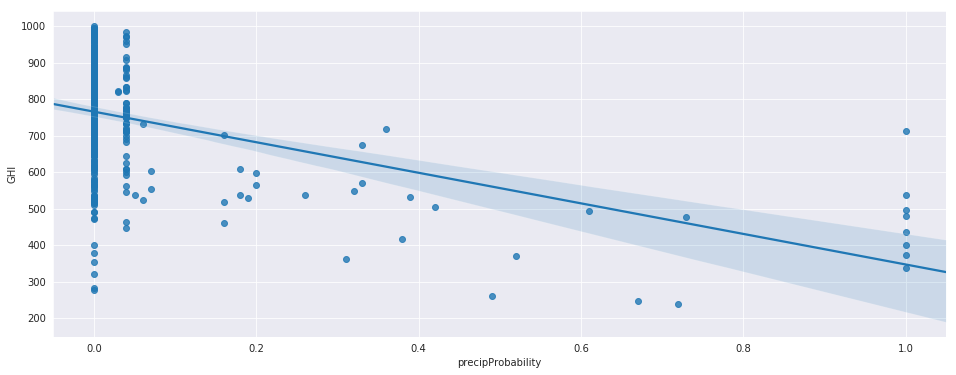

In [167]:

plt.figure(figsize=(16, 6))
sns.regplot(x='precipProbability',y='GHI',data=short)


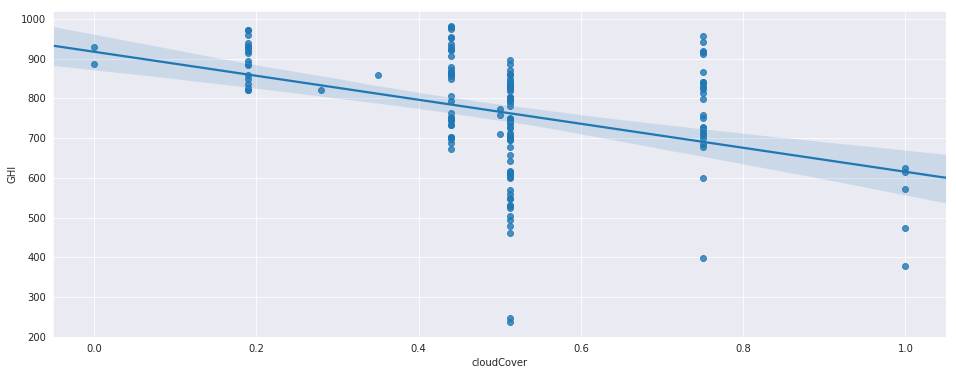

In [153]:
|short = df[((df.zen < 10) & (df.zen > 3)) & (df.GHI > 100)]
plt.figure(figsize=(16, 6))
sns.regplot(x='cloudCover',y='GHI',data=short)